In [45]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")


pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed'

file_names = os.listdir(path)
print(len(file_names))

file_paths = []

for file in file_names:
    
    file_path = path + '/' + file
    file_paths.append(file_path)

print(len(file_paths))
file_paths

14
14


['/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PCA_trial.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/.DS_Store',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PCA_melt.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/DRL_session.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PD_trial.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PD_session.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/DRL_trial.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PCA_session.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med

In [52]:
PCA_melt = pd.read_csv(file_paths[2])
PCA_melt = pd.DataFrame(data = PCA_melt)
PCA_melt['group'] = PCA_melt['group'].replace({'4':'sham','5':'blast'})
PCA_melt_wi = PCA_melt[PCA_melt['part'] == 'within']
PCA_melt_wi.head()

,part,group,animal,active_lever,1se_food_lat,lp_AUC,lever_press_sum,lever_press_sum.1,lever_press_sum.2,lever_press_sum.3,lever_press_sum.4,lever_press_sum.5,lever_press_sum.6,food_AUC,food_entry_sum,food_entry_sum.1,food_entry_sum.2,food_entry_sum.3,food_entry_sum.4,food_entry_sum.5,food_entry_sum.6,response_bias,response_bias.1,response_bias.2,response_bias.3,response_bias.4,response_bias.5,response_bias.6,lever_press_trial_count,lever_press_trial_count.1,lever_press_trial_count.2,lever_press_trial_count.3,lever_press_trial_count.4,lever_press_trial_count.5,lever_press_trial_count.6,head_entry_trial_count,head_entry_trial_count.1,head_entry_trial_count.2,head_entry_trial_count.3,head_entry_trial_count.4,head_entry_trial_count.5,head_entry_trial_count.6,lever_press_prob,lever_press_prob.1,lever_press_prob.2,lever_press_prob.3,lever_press_prob.4,lever_press_prob.5,lever_press_prob.6,head_entry_prob,head_entry_prob.1,head_entry_prob.2,head_entry_prob.3,head_entry_prob.4,head_entry_prob.5,head_entry_prob.6,prob_diff,prob_diff.1,prob_diff.2,prob_diff.3,prob_diff.4,prob_diff.5,prob_diff.6,lever_press_lat,lever_press_lat.1,lever_press_lat.2,lever_press_lat.3,lever_press_lat.4,lever_press_lat.5,lever_press_lat.6,food_entry_lat,food_entry_lat.1,food_entry_lat.2,food_entry_lat.3,food_entry_lat.4,food_entry_lat.5,food_entry_lat.6,latency_score,latency_score.1,latency_score.2,latency_score.3,latency_score.4,latency_score.5,latency_score.6,PCA_score_3,PCA_score_3.1,PCA_score_3.2,PCA_score_3.3,PCA_score_3.4,PCA_score_3.5,PCA_score_3.6,PCA_score_2,PCA_score_2.1,PCA_score_2.2,PCA_score_2.3,PCA_score_2.4,PCA_score_2.5,PCA_score_2.6,round,round.1,round.2,round.3,round.4,round.5,round.6,PCA_56,PCA_56.1,PCA_56.2,PCA_56.3,PCA_56.4,PCA_56.5,PCA_56.6,PCA_group,PCA_group.1,PCA_group.2,PCA_group.3,PCA_group.4,PCA_group.5,PCA_group.6
1,within,sham,1116,right,2.647083,0,0,0,0,0,0,0,0,54.5,2,3,8,10,19,9,9,-1.0,-1.00,-1.000000,-1.000000,-1.000000,-1.0,-1.00,0,0,0,0,0,0,0,2,2,4,6,8,8,4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.08,0.08,0.16,0.24,0.32,0.32,0.16,-0.08,-0.08,-0.16,-0.24,-0.32,-0.32,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.450000,5.445000,3.1100,4.278333,4.186250,5.931250,4.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.54,-0.540,-0.580000,-0.620000,-0.660000,-0.66,-0.580,1,1,1,1,1,1,1,-0.6200,-0.6200,-0.6200,-0.6200,-0.6200,-0.6200,-0.6200,GT,GT,GT,GT,GT,GT,GT
2,within,sham,1117,right,0.971667,3,0,0,1,0,2,0,0,111.0,15,13,7,5,11,45,45,-1.0,-1.00,-0.750000,-1.000000,-0.692308,-1.0,-1.00,0,0,1,0,1,0,0,8,7,4,3,7,19,15,0.00,0.00,0.04,0.00,0.04,0.0,0.00,0.32,0.28,0.16,0.12,0.28,0.76,0.60,-0.32,-0.28,-0.12,-0.12,-0.24,-0.76,-0.60,NaN,NaN,6.77,NaN,0.23,NaN,NaN,4.288750,6.331429,6.6050,2.696667,3.571429,3.926316,3.140667,NaN,NaN,-0.01650,NaN,0.334143,NaN,NaN,NaN,NaN,-0.295500,NaN,-0.199388,NaN,NaN,-0.66,-0.640,-0.435000,-0.560000,-0.466154,-0.88,-0.800,1,1,1,1,1,1,1,-0.8400,-0.8400,-0.8400,-0.8400,-0.8400,-0.8400,-0.8400,GT,GT,GT,GT,GT,GT,GT
3,within,sham,1118,right,7.694091,1,0,0,0,0,0,0,2,51.5,1,1,8,18,12,5,14,-1.0,-1.00,-1.000000,-1.000000,-1.000000,-1.0,-0.75,0,0,0,0,0,0,2,1,1,5,5,4,4,9,0.00,0.00,0.00,0.00,0.00,0.0,0.08,0.04,0.04,0.20,0.20,0.16,0.16,0.36,-0.04,-0.04,-0.20,-0.20,-0.16,-0.16,-0.28,NaN,NaN,NaN,NaN,NaN,NaN,7.275,3.200000,8.250000,7.5880,5.348000,3.742500,5.542500,4.278889,NaN,NaN,NaN,NaN,NaN,NaN,-0.299611,NaN,NaN,NaN,NaN,NaN,NaN,-0.443204,-0.52,-0.520,-0.600000,-0.600000,-0.580000,-0.58,-0.515,1,1,1,1,1,1,1,-0.5475,-0.5475,-0.5475,-0.5475,-0.5475,-0.5475,-0.5475,GT,GT,GT,GT,GT,GT,GT
4,within,sham,1119,left,2.192609,0,0,0,0,0,0,0,0,21.5,4,2,5,0,0,12,1,-1.0,-1.00,-1.000000,0.000000,0.000000,-1.0,-1.00,0,0,0,0,0,0,0,3,2,3,0,0,7,1,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.12,0.08,0.12,0.00,0.00,0.28,0.04,-0.12,-0.08,-0.12,0.00,0.00,-0.28,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.576667,8.805000,5.7400,NaN,NaN,4.475714,3.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.56,-0.540,-0.560000,0.000000,0.000000,-0.64,-0.520,1,1,1,

In [10]:
DRL_melt = pd.read_csv(file_paths[13])
DRL_melt = pd.DataFrame(data = DRL_melt)
DRL_melt['group'] = DRL_melt['group'].replace({'4':'sham','5':'blast'})
DRL_melt = DRL_melt.drop(DRL_melt.index[0])
DRL_melt.head()

,group,animal,active_lever,DRL_error,DRL_error.1,DRL_error.2,Total Area,DRL_reset_count,DRL_reset_count.1,DRL_reset_count.2,DRL_reset_latency_1st,DRL_reset_latency_1st.1,DRL_reset_latency_1st.2,DRL_reset_latency_IRT,DRL_reset_latency_IRT.1,DRL_reset_latency_IRT.2,HE_DRL_count,HE_DRL_count.1,HE_DRL_count.2,HE_DRL_latency_1st,HE_DRL_latency_1st.1,HE_DRL_latency_1st.2,HE_DRL_latency_IRT,HE_DRL_latency_IRT.1,HE_DRL_latency_IRT.2,HE_reward_count,HE_reward_count.1,HE_reward_count.2,HE_reward_latency_1st,HE_reward_latency_1st.1,HE_reward_latency_1st.2,LP_count,LP_count.1,LP_count.2,reinforcement_count,reinforcement_count.1,reinforcement_count.2,reinforcement_latency_1st,reinforcement_latency_1st.1,reinforcement_latency_1st.2,session,session.1,session.2,trial_duration,trial_duration.1,trial_duration.2
1,sham,1116,right,0,0.23632581,0.632393453,0.5525,0,162.3333333,274.6666667,NaN,8.802593985,20.52479487,NaN,3.556081674,6.640185094,60.33333333,95,90.33333333,196.9122222,20.97860126,52.49435897,69.12923045,14.13583498,26.8422032,0.666666667,47,16,3.135,2.484336317,1.461290033,0.666666667,209.3333333,290.6666667,0.666666667,47,16,1222.495,69.98511023,156.3501324,2,2,2,2100,68.19053708,159.1911765
2,sham,1117,right,0.159886549,0.552453237,0.681076473,0.9729,80.66666667,279,218,2.303346878,11.79216522,19.57825758,1.865016456,4.047831546,9.204520313,129.6666667,245.3333333,141.6666667,9.14128521,10.23292551,33.85342857,4.585562518,7.388920471,16.00404021,90,51.66666667,15,2.633495172,0.709040572,0.777179894,175,330.6666667,233,94.33333333,51.66666667,15,28.35461977,54.19055809,217.2344894,2,2,2,28.96456126,53.74469777,202.7255639
3,sham,1118,right,0.305105717,0.342425709,0.794039209,0.8920,161,103.6666667,474.3333333,2.054636099,4.914577945,11.0812037,1.584050992,4.061342314,4.626919994,134.3333333,77.66666667,255.6666667,10.67648929,14.66107913,28.66178451,6.524409937,13.32097773,10.2711202,71.66666667,49,9.666666667,4.44566373,4.118471055,3.140694444,244.6666667,155.3333333,484,83.66666667,51.66666667,9.666666667,32.10112774,52.47074126,283.3508333,2,2,2,32.00357782,52.08134642,259.2307692
4,sham,1119,left,0.148883837,0.385220057,0.535030069,0.7272,54.33333333,367.6666667,278.6666667,1.313873467,11.63720763,16.42195767,1.188262351,3.621879702,7.797336043,132,336,185,14.51262626,13.5940801,31.92134392,7.456986139,6.742300144,11.72237148,81.33333333,118,14,2.497247479,3.026240228,0.717071895,136.6666667,486.6666667,292.6666667,82.33333333,119,14,33.04807038,39.66668147,195.9301242,2,2,2,32.93358815,43.20214786,188.0681818
5,sham,1120,left,0.180425492,0.122327441,0.562684546,0.4939,25.66666667,20.33333333,238.3333333,1.086529412,3.337232906,17.12052991,1.360027778,5.064037037,6.861585986,75,70,227.3333333,20.89645548,21.02636855,21.87528132,15.21472718,9.772106121,8.557650682,49,52.66666667,22.66666667,2.44207921,1.527807417,1.100380952,76.33333333,74,261,50.66666667,53.66666667,22.66666667,52.94594149,50.44352215,137.8356429,2,2,2,52.52805705,49.82142857,141.9512195


In [33]:
PD_melt = pd.read_csv(file_paths[11])
PD_melt = pd.DataFrame(data = PD_melt)
PD_melt['group'] = PD_melt['group'].replace({4:'sham',5:'blast'})
PD_melt_wi = PD_melt[PD_melt['part'] == 'within']
PD_melt_wi = PD_melt_wi[PD_melt_wi['sub_session'] == 2]
PD_melt_wi.head()

,part,group,animal,active_lever,sub_session,HE_ITI_count,HE_ITI_count.1,HE_ITI_count.2,HE_ITI_count.3,HE_ITI_count.4,HE_ITI_latency_1st,HE_ITI_latency_1st.1,HE_ITI_latency_1st.2,HE_ITI_latency_1st.3,HE_ITI_latency_1st.4,HE_TO_count,HE_TO_count.1,HE_TO_count.2,HE_TO_count.3,HE_TO_count.4,HE_TO_latency_1st,HE_TO_latency_1st.1,HE_TO_latency_1st.2,HE_TO_latency_1st.3,HE_TO_latency_1st.4,HE_trial_count,HE_trial_count.1,HE_trial_count.2,HE_trial_count.3,HE_trial_count.4,HE_trial_latency_1st,HE_trial_latency_1st.1,HE_trial_latency_1st.2,HE_trial_latency_1st.3,HE_trial_latency_1st.4,HE_trial_start_latency_1st,HE_trial_start_latency_1st.1,HE_trial_start_latency_1st.2,HE_trial_start_latency_1st.3,HE_trial_start_latency_1st.4,HE_trial_start_latency_1st_mean,high_lever_count,high_lever_count.1,high_lever_count.2,high_lever_count.3,high_lever_count.4,high_lever_latency_1st,high_lever_latency_1st.1,high_lever_latency_1st.2,high_lever_latency_1st.3,high_lever_latency_1st.4,high_reward_perc,high_reward_perc.1,high_reward_perc.2,high_reward_perc.3,high_reward_perc.4,high_reward_perc_mean,perc_AUC,Slope,high_reward_ratio,high_reward_ratio.1,high_reward_ratio.2,high_reward_ratio.3,high_reward_ratio.4,low_lever_count,low_lever_count.1,low_lever_count.2,low_lever_count.3,low_lever_count.4,low_lever_latency_1st,low_lever_latency_1st.1,low_lever_latency_1st.2,low_lever_latency_1st.3,low_lever_latency_1st.4,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,lever_ratio_ave,reinforcement_count,reinforcement_count.1,reinforcement_count.2,reinforcement_count.3,reinforcement_count.4,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,reinforcement_latency_1st,reinforcement_latency_1st.1,reinforcement_latency_1st.2,reinforcement_latency_1st.3,reinforcement_latency_1st.4,trial_count,trial_count.1,trial_count.2,trial_count.3,trial_count.4
1,within,sham,1117.0,right,2.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,27,12,12,11,13,12.293479,6.481011,4.856910,5.84991,10.024356,10.413383,5.582821,6.032404,6.013541,8.799487,5.876255303,18,16,16,10,12,10.637683,5.543656,7.535531,6.482910,10.960742,78.260870,69.565217,66.666667,45.454545,50.000000,60.562143,61.45,7.695,-28.287497,-34.219386,2.722123,-10.252364,10.972517,5,7,8,12,12,19.0299,11.311329,7.136150,7.964067,8.793233,-0.608804,-0.720282,-0.806616,-0.701824,-0.700876,-0.742907,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,23,23,23,23
2,within,sham,1118.0,right,2.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,10,5,17,2,5,13.838233,14.719925,12.123242,5.12490,3.052400,14.340621,11.094908,12.436017,4.348654,4.331154,9.293193056,9,7,10,13,5,17.283244,11.851329,12.994900,5.922215,7.035900,64.285714,58.333333,62.500000,54.166667,20.833333,58.333333,54.39,15.460,-3.680024,-22.886211,-10.927184,-5.308785,10.194069,5,5,6,11,19,18.6039,18.885920,16.183250,6.586264,5.734116,-0.551116,-0.510849,-0.588648,-0.783179,-0.568335,-0.627559,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,23,23,23,23
3,within,sham,1119.0,left,2.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,21,24,13,13,20,11.013545,17.088663,4.291567,6.84865,5.181900,8.108031,9.458541,7.829405,6.940857,4.999450,8.076267684,8,15,5,10,5,11.177413,10.487900,6.365900,8.018900,8.867920,61.538462,68.181818,25.000000,47.619048,22.727273,46.933622,45.73,20.000,-0.394271,-5.650838,-19.206641,0.822337,27.368002,5,7,15,11,17,11.2659,11.744200,9.392573,7.888091,5.056959,-0.690516,-0.706123,-0.453802,-0.715781,-0.635984,-0.625235,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,23,23,23,23
4,within,sham,1120.0,left,2.0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,11,5,8,6,3,10.094356,12.339900,7.676567,5.30990,3.576600,10.458326,12.144455,7.753405,8.227683,4.836268,9.375180961,12,5,9,6,0,15.219067,18.549900,9.525467,10.763233,NaN,63.157895,45.454545,45.000000,33.333333,0.000000,41.262626,38.84,12.330,21.687958,20.991483,-2.434373,6.370207,NaN,7,6,11,12,22,9.7942,12.113250,10.000809,9.474075,6.356268,-0.73

In [56]:
PCA_melt_wi_short = PCA_melt_wi[['group', 'animal', 'lp_AUC', 'food_AUC', '1se_food_lat']]
DRL_melt_short = DRL_melt[['group', 'animal', 'DRL_error', 'DRL_error.1', 'DRL_error.2',]]
PD_melt_wi_short = PD_melt_wi[['group', 'animal', 'high_reward_perc_mean', 'lever_ratio_ave', 'HE_trial_start_latency_1st_mean']]
PD_melt_wi_short['animal'] = PD_melt_wi_short['animal'].astype('int').astype('str')

final_merge = PCA_melt_wi_short.merge(PD_melt_wi_short, on=['group', 'animal',]).merge(DRL_melt_short, on=['group', 'animal',])
final_merge.columns = ['group', 'animal', 
                       'PCA_lever', 'PCA_food', 'PCA_HElat',
                       'PD_risk', 'PD_lever', 'PD_HElat',
                       'DRL5', 'DRL15', 'DRL30']
final_merge['DRL5'] = final_merge['DRL5'].astype('float')
final_merge['DRL15'] = final_merge['DRL15'].astype('float')
final_merge['DRL30'] = final_merge['DRL30'].astype('float')
final_merge['PCA_lever'] = final_merge['PCA_lever'].astype('float')
final_merge['PD_HElat'] = final_merge['PD_HElat'].astype('float')

final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   group      20 non-null     object 
 1   animal     20 non-null     object 
 2   PCA_lever  20 non-null     float64
 3   PCA_food   20 non-null     float64
 4   PCA_HElat  20 non-null     float64
 5   PD_risk    20 non-null     float64
 6   PD_lever   20 non-null     float64
 7   PD_HElat   20 non-null     float64
 8   DRL5       20 non-null     float64
 9   DRL15      20 non-null     float64
 10  DRL30      20 non-null     float64
dtypes: float64(9), object(2)
memory usage: 1.9+ KB


In [57]:
params = ['PCA_lever', 'PCA_food', 'PCA_HElat',
                       'PD_risk', 'PD_lever', 'PD_HElat',
                       'DRL5', 'DRL15', 'DRL30']

PCA_lever


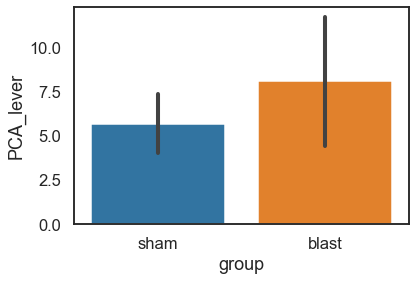

PCA_food


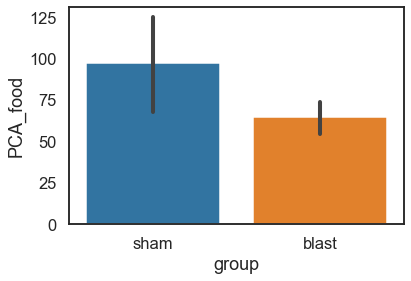

PCA_HElat


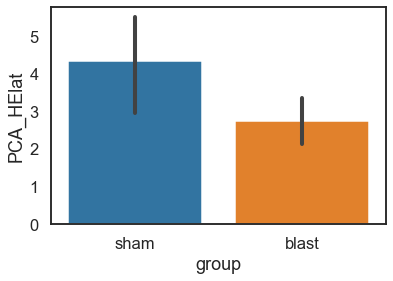

PD_risk


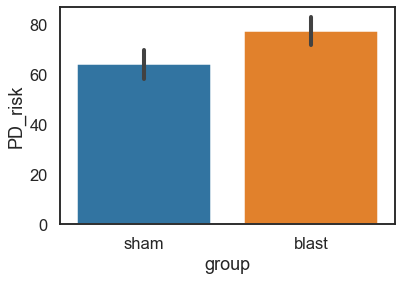

PD_lever


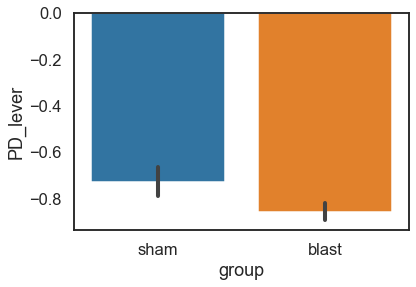

PD_HElat


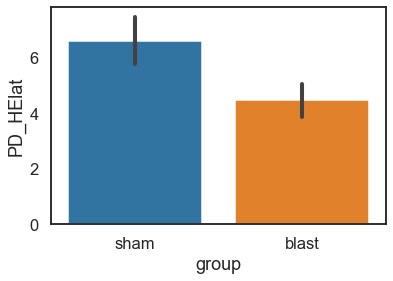

DRL5


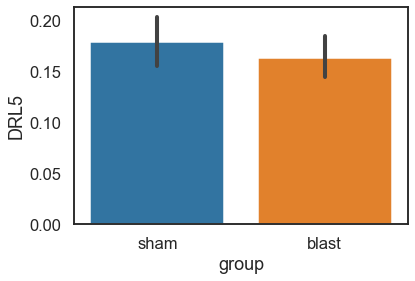

DRL15


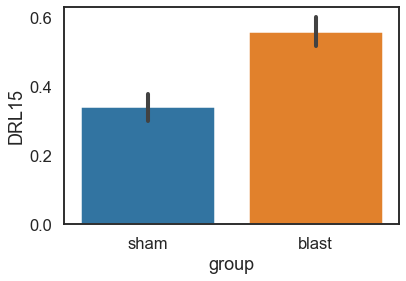

DRL30


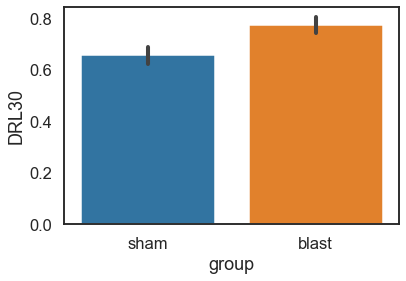

In [87]:
for param in params:
    print(param)
    sns.barplot(x='group', y=param, data=final_merge, ci=68)
    plt.show()

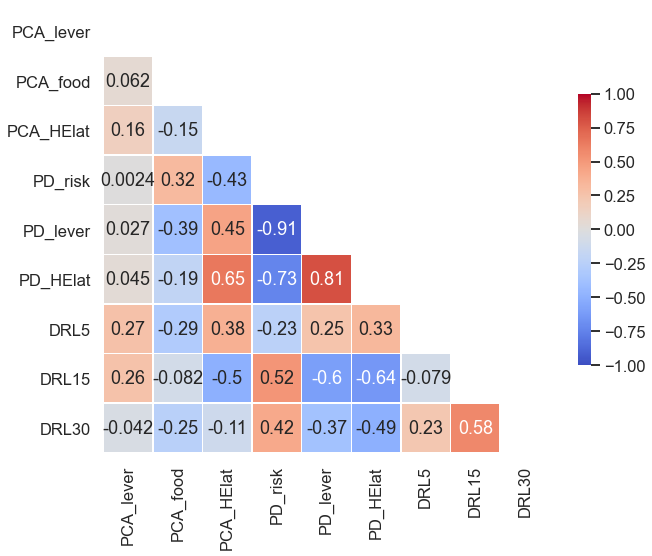

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
corr1 = final_merge[params].corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))
ax = sns.heatmap(corr1, annot=True, vmin=-1, vmax=1, center=0, cmap = 'coolwarm', mask=mask,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()


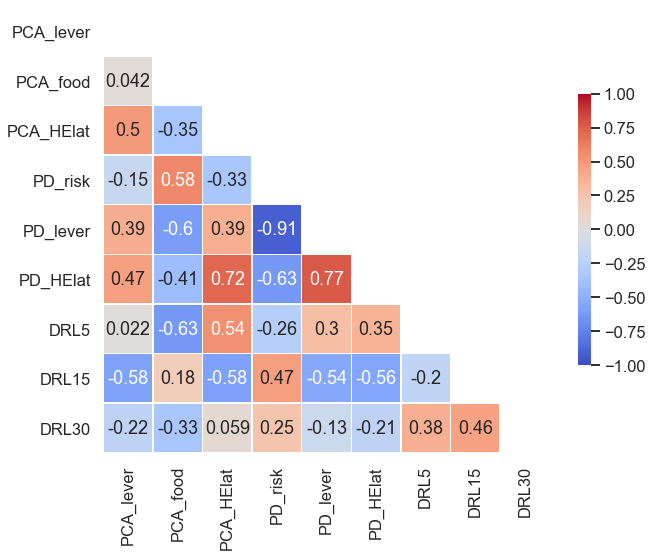

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
corr1 = final_merge[final_merge['group']=='sham'][params].corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))
ax = sns.heatmap(corr1, annot=True, vmin=-1, vmax=1, center=0, cmap = 'coolwarm', mask=mask,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()


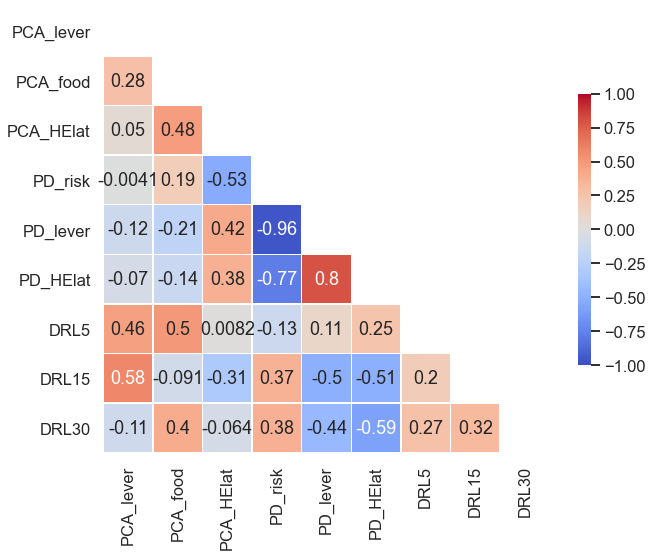

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
corr1 = final_merge[final_merge['group']=='blast'][params].corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))
ax = sns.heatmap(corr1, annot=True, vmin=-1, vmax=1, center=0, cmap = 'coolwarm', mask=mask,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()


In [61]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error, mean_absolute_error, r2_score


In [63]:
final_merge_params = final_merge[params]

# center and scale the data
scaler = StandardScaler()
#scaler = RobustScaler()

final_merge_scaled = scaler.fit_transform(final_merge_params)

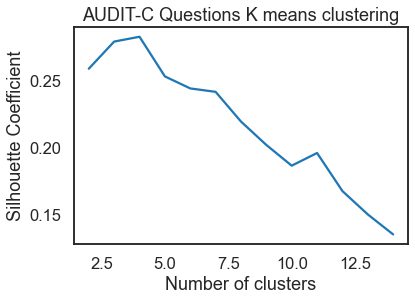

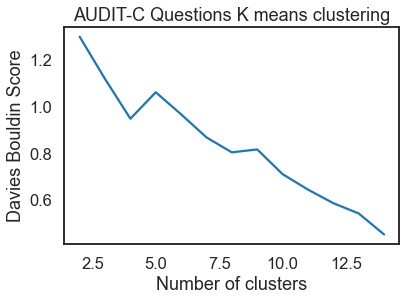

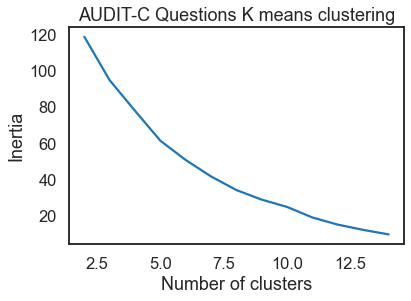

In [64]:
data = final_merge_scaled

#pick cluster number based on silhouette coefficient
k_range = range(2,15)

base_scores = []
sil_scores = []
db_scores = []
ch_scores = []
mse_scores = []

for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=39)
    km_ss.fit(data)
    
    sil_scores.append(silhouette_score(data, km_ss.labels_))
    db_scores.append(davies_bouldin_score(data, km_ss.labels_))
    #ch_scores.append(calinski_harabasz_score(data, km_ss.labels_))
    mse_scores.append(km_ss.inertia_)
    
# plot the results
plt.plot(k_range, sil_scores)
plt.title('AUDIT-C Questions K means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# plot the results
plt.plot(k_range, db_scores)
plt.title('AUDIT-C Questions K means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()
    
# plot the results
plt.plot(k_range, mse_scores)
plt.title('AUDIT-C Questions K means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

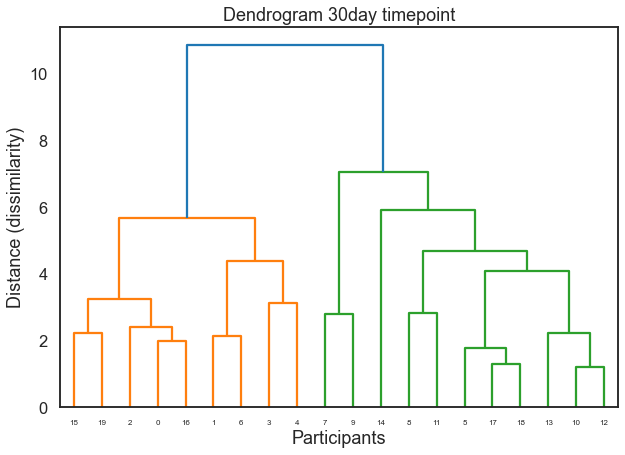

In [66]:
#viz dendrogram to find if three clusters makes sense
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram 30day timepoint")  
plt.ylabel("Distance (dissimilarity)")
plt.xlabel("Participants")
dend = shc.dendrogram(shc.linkage(final_merge_scaled, method='ward'), 
                      distance_sort='ascending',
                      show_leaf_counts=True, leaf_font_size=8)

<Figure size 3600x3600 with 0 Axes>

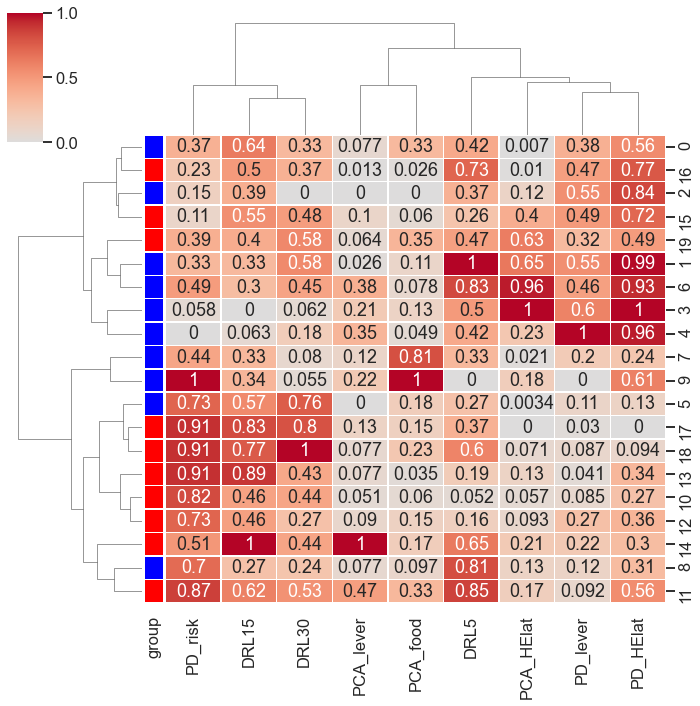

In [101]:

lut = dict(zip(final_merge['group'].unique(), "brg"))
row_colors = final_merge['group'].map(lut)
plt.figure(figsize=(50,50))
g = sns.clustermap(final_merge[params], row_colors=row_colors,
                 metric="euclidean", standard_scale=1, method="ward",
               annot=True, vmin=0, vmax=1, center=0, cmap = 'coolwarm', 
               square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
